# 二. 逻辑回归

## 1. 二分类逻辑回归

$$
z= \vec{x}\vec{w} = w_0 + w_1x_1 +w_2x_2 + ... +w_nx_n\\
y=h_w(x)=sigmoid(z)=\frac{1}{1+e^{-z}}
$$

### (1). 交叉熵损失函数

$$
J(w) = -\frac{1}{m}\sum_{i=1}^m{[y^{(i)}log(\widehat{y}^{(i)}) + (1-y^{(i)})log(1-\widehat{y}^{(i)})]}
$$

### (2). 交叉熵损失函数原理推导

交叉熵损失函数的本质是等价于极大似然估计，已知：
$$
P(y=1|x, w) = h_w(x)\\
P(y-0 |x, w) = 1 - h_w(x)
$$
因此
$$
P(y|x, w) = h_w(x)^y(1-h_w(x))^{1-y}
$$
极大似然函数
$$
L(w) = \prod_{i=1}^m{h_w(x^{(i)})^{y^{(i)}}(1-h_w(x^{(i)}))^{1-y^{(i)}}}
$$
对极大似然函数取对数然后取反，即得交叉熵损失函数（为了样本规模影响loss大小，损失函数除以了m），因此最小化交叉熵损失函数等价于最大化极大似然函数

### (3). 梯度下降

#### (i).  偏导

$$
\frac{\partial{J}}{\partial{w}} = \frac{1}{m}\sum_{i=1}^m{(\widehat{y}^{(i)}-y^{(i)})x^{(i)}}=\frac{1}{m}X^T(h_w(X) - \vec{y})
$$

#### (ii). 参数更新

$$
w = w -\alpha * \frac{\partial{J}}{\partial{w}}
$$

## 2. 多元逻辑回归

* one vs rest 考虑某种类型为正值1，其余全为0，训练K个logistic分类器，适合K个类型不互斥的情况
* one vs one: 选择一个类别和另一个类别训练分类器， softmax 多元逻辑回归

### (1). softmax 多元逻辑回归

$$
P(y=k|x, w)=\frac{e^{xw_k}}{\sum_{t=1}^Ke^{xw_t}}
$$

其中$w_{K*n}$

### (2). 损失函数

$$
J(w) = -\sum_{i=1}^m{\sum_{t=1}^K{1_{y=j}log(P(y=t|x, w))}}
$$

## 3. python 实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))


def model(X, theta):
    """
    X array(m * n)
    theta array(n * 1)
    
    return : array (m * 1)
    """
    return sigmoid(X @ theta)


def computerCost(X, y, theta):
    """
    X: array(m * n)
    y: array(m * 1)
    theta: array(n * 1)
    """
    y_pred = model(X, theta)
    m = X.shape[0]
    J = (-1/m) * (y.T @ np.log(y_pred) +(1-y.T) @ np.log(1-y_pred))
    return np.squeeze(J)


def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    X: array(m * n)
    y: array(m * 1)
    theta: array(n * 1)
    alpha: learning rate between (0, 1)
    num_iters: number of iteration times
    
    n should be the feature number plus 1
    '''
    J_history = np.empty((num_iters, 1))
    for i in range(num_iters):
        theta = theta - alpha * (1/m * (X.T @ (model(X, theta) - y)))
        J_history[i] = computerCost(X, y, theta)
        print('.', end='')
    return theta, J_history

### 1. 一个实例：手写数字识别

In [3]:
def one_vs_all(X, y, k, theta, alpha, num_iters):
    
    J_history = np.empty((k, num_iters, 1))
 
    # 训练k个分类器
    for i in range(k):
        y_k = (y==i)
        theta_k = theta[:, i]
        theta_k = theta_k[:, np.newaxis]
        theta_k, J_history[i, :, :] = gradientDescent(X, y_k, theta_k, alpha, num_iters)
        theta[:, i] = np.squeeze(theta_k)
        print('\n**************\n')

        
    return theta, J_history


def predict(X, theta):
    y_pred = model(X, theta)
    y_type = np.argmax(y_pred, axis=1)
    return y_type[:, np.newaxis]
        
    

In [4]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
m = len(y)
n = X.shape[1] + 1
X_adjust = np.hstack((np.ones((m, 1)), X))
y = np.expand_dims(y, axis=1)

k = 10
alpha = 0.1
num_iters = 100
theta = np.random.random((n, k))

theta, J_history = one_vs_all(X_adjust, y, k, theta, alpha, num_iters)

....................................................................................................
**************

......................................

D:\Applications\anaconda\Anaconda\envs\myEnv\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
D:\Applications\anaconda\Anaconda\envs\myEnv\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in matmul


..............................................................
**************

....................................................................................................
**************

....................................................................................................
**************

....................................................................................................
**************

....................................................................................................
**************

....................................................................................................
**************

....................................................................................................
**************

....................................................................................................
**************

....................................................................................................
*

predict number:
 [[2]]
true number:
 [2]


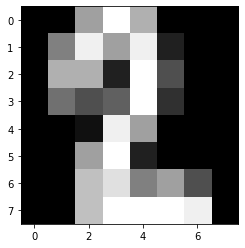

In [5]:
# 随意选择一个数据观察预测值和真实值，并可视化该手写数字灰度图
pick_index = 268
x = X[pick_index, :]
x_adjust = np.expand_dims(x, axis=0)
x_adjust = np.hstack((np.ones((1, 1)), x_adjust))
y_pred = predict(x_adjust, theta)
plt.imshow(digits.images[pick_index], cmap='gray')
print("predict number:\n", y_pred)
print("true number:\n", y[pick_index])



In [6]:
# 计算准确率
y_pred = predict(X_adjust, theta)
m = len(y_pred)
diff = (y_pred == y)
accuracy = np.sum((y_pred == y)) / m
print('accuracy:\n', accuracy)

accuracy:
 0.9465776293823038
